In [1]:
from model import *

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
!free -m

              total        used        free      shared  buff/cache   available
Mem:           3950         392        2416          22        1141        3230
Swap:             0           0           0


In [4]:
from lender_pipeline import *

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler

ls = pd.read_csv('lender_dataset_sampled.csv')
# ls = pd.read_csv('lender_dataset.csv')

In [5]:
df, X = feature_engineer(ls)

In [6]:
X.shape

(51208, 242)

In [7]:
reduced_X_3D, imp_features = PCA_reduce(X,3) 

#0 Principle Component top 5 contributors are: [77 61 54 76 14]
#1 Principle Component top 5 contributors are: [43 75 10 79 83]
#2 Principle Component top 5 contributors are: [106   0 241 113  94]
Reduced X shape: (51208, 3)


In [8]:
counter = print_imp_features(df,imp_features)

Counter({'NUM_BUNDLE_RURAL_LOANS': 1, 'NUM_SECTOR_FOOD_LOANS': 1, 'NUM_DISTINCT_COUNTRIES_LENT_TO': 1, 'LIFETIME_ACCOUNT_LOAN_PURCHASE_NUM': 1, 'FIRST_BASKET_CATEGORY_Promo Lender': 1, 'FIRST_TIME_DEPOSITOR_REPORTING_CATEGORY_none': 1, 'NUM_BUNDLE_INNOVATIVE_LOANS': 1, 'NUM_SECTOR_SERVICE_LOANS': 1, 'NUM_BUNDLE_MOBILE_TECH_LOANS': 1, 'NUM_BUNDLE_JOB_CREATION_SME_LOANS': 1, 'ACTIVE_LIFETIME_MONTHS': 1, 'FIRST_BASKET_CATEGORY_Depositor - Lender Donor': 1, 'USER_LOCATION_COUNTRY_nan': 1, 'NUM_BUNDLE_UNDERFUNDED_LOANS': 1, 'CORE_LOAN_PURCHASE_NUM': 1})


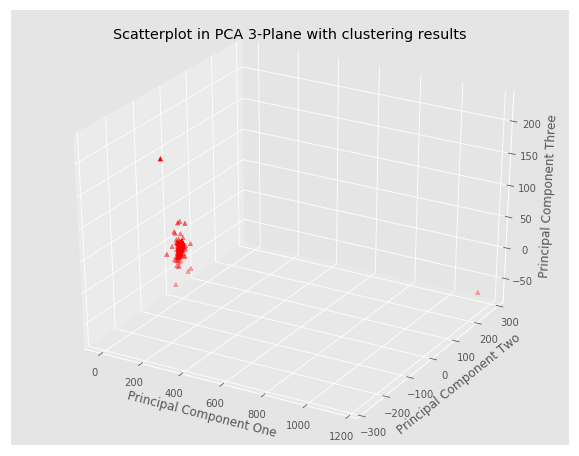

In [9]:
matplotlib_3D_X_reduced(reduced_X_3D)

In [10]:
np.argmax(np.abs(reduced_X_3D[:,0]))

27627

In [11]:
np.argmax(np.abs(reduced_X_3D[:,1]))

27627

In [12]:
np.argmax(np.abs(reduced_X_3D[:,2]))

2987

In [13]:
df.loc[[2987,27627],counter.keys()] 
#outliers

,NUM_BUNDLE_RURAL_LOANS,NUM_SECTOR_FOOD_LOANS,NUM_DISTINCT_COUNTRIES_LENT_TO,LIFETIME_ACCOUNT_LOAN_PURCHASE_NUM,FIRST_BASKET_CATEGORY_Promo Lender,FIRST_TIME_DEPOSITOR_REPORTING_CATEGORY_none,NUM_BUNDLE_INNOVATIVE_LOANS,NUM_SECTOR_SERVICE_LOANS,NUM_BUNDLE_MOBILE_TECH_LOANS,NUM_BUNDLE_JOB_CREATION_SME_LOANS,ACTIVE_LIFETIME_MONTHS,FIRST_BASKET_CATEGORY_Depositor - Lender Donor,USER_LOCATION_COUNTRY_nan,NUM_BUNDLE_UNDERFUNDED_LOANS,CORE_LOAN_PURCHASE_NUM
2987,2607,6522,72,20674,0,0,341,1667,250,245,127,0,0,1145,18906
27627,10447,18122,16,748,0,0,0,5825,0,0,76,0,0,12813,128159


In [14]:
df=df.drop(df.index[[2987,27627]])

In [15]:
re_X,imp_f = PCA_reduce(df.values,3)

#0 Principle Component top 5 contributors are: [18 19  6 15  7]
#1 Principle Component top 5 contributors are: [14 19 15  7  6]
#2 Principle Component top 5 contributors are: [23 15  7 18 19]
Reduced X shape: (51206, 3)


In [16]:
counter2 = print_imp_features(df,imp_f)

Counter({'FIRST_YEAR_LOAN_PURCHASE_TOTAL': 3, 'CORE_LOAN_PURCHASE_TOTAL': 3, 'LIFETIME_ACCOUNT_LOAN_PURCHASE_TOTAL': 3, 'FIRST_YEAR_DEPOSIT_TOTAL': 2, 'LIFETIME_DEPOSIT_TOTAL': 2, 'FIRST_DAY_DEPOSIT_TOTAL': 1, 'CORE_LOAN_PURCHASE_NUM': 1})


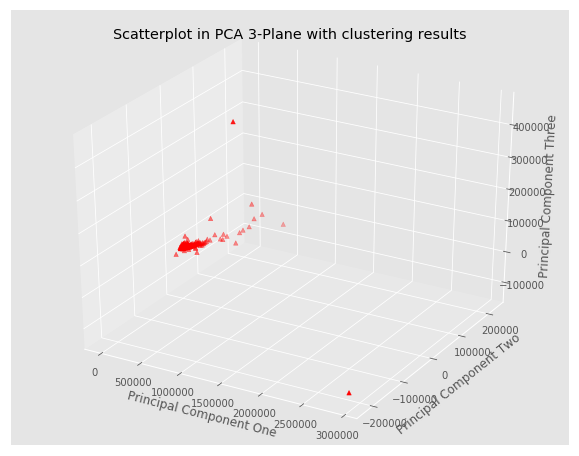

In [17]:
matplotlib_3D_X_reduced(re_X)

In [18]:
np.argmax(np.abs(re_X[:,0]))

15038

In [19]:
np.argmax(np.abs(re_X[:,2]))

19433

In [20]:
df.shape

(51206, 242)

In [21]:
re_X.shape

(51206, 3)

In [22]:
df.loc[[15038,19433],counter2.keys()] 
#why they are outliers?

,FIRST_YEAR_LOAN_PURCHASE_TOTAL,CORE_LOAN_PURCHASE_TOTAL,FIRST_YEAR_DEPOSIT_TOTAL,FIRST_DAY_DEPOSIT_TOTAL,LIFETIME_ACCOUNT_LOAN_PURCHASE_TOTAL,CORE_LOAN_PURCHASE_NUM,LIFETIME_DEPOSIT_TOTAL
15038,25,100,28.75,28.75,100.0,4,178.75
19433,25,50,25.00,25.00,50.0,2,25.00


In [23]:
df=df.drop(df.index[[15038,19433]])

In [24]:
re_X,imp_f = PCA_reduce(df.values,3)

#0 Principle Component top 5 contributors are: [18 19  6 15  7]
#1 Principle Component top 5 contributors are: [ 7  6 15 89 88]
#2 Principle Component top 5 contributors are: [ 7 15 18 19  6]
Reduced X shape: (51204, 3)


In [25]:
counter3 = print_imp_features(df,imp_f)

Counter({'CORE_LOAN_PURCHASE_TOTAL': 3, 'LIFETIME_ACCOUNT_LOAN_PURCHASE_TOTAL': 3, 'LIFETIME_DEPOSIT_TOTAL': 3, 'FIRST_YEAR_LOAN_PURCHASE_TOTAL': 2, 'FIRST_YEAR_DEPOSIT_TOTAL': 2, 'last_transaction_today': 1, 'last_login_today': 1})


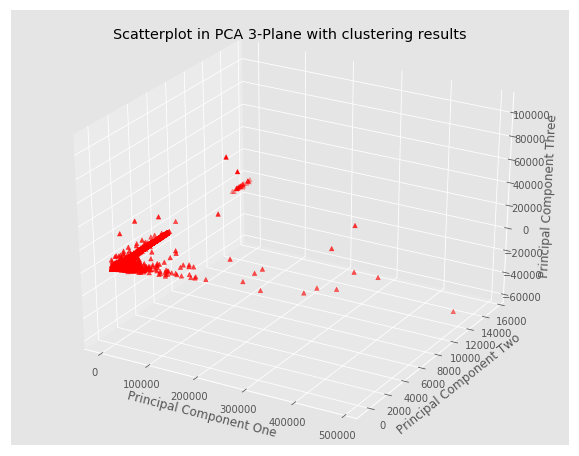

In [26]:
matplotlib_3D_X_reduced(re_X)

In [27]:
!free -m

              total        used        free      shared  buff/cache   available
Mem:           3950         805        2003          22        1141        2816
Swap:             0           0           0


In [28]:
re_X.shape

(51204, 3)

In [29]:
df.shape

(51204, 242)

In [30]:
y, assigned_cluster = kmeans_cluster(X_reduced=re_X,cluster_num=8)

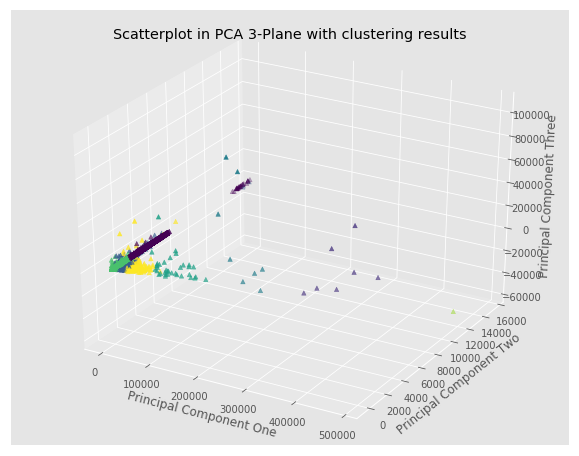

In [31]:
plot_3D_kmeans(re_X,y)

In [32]:
df['cluster'] = assigned_cluster

In [33]:
df.groupby('cluster')[list(counter3.keys())].mean()

,FIRST_YEAR_LOAN_PURCHASE_TOTAL,last_transaction_today,last_login_today,CORE_LOAN_PURCHASE_TOTAL,FIRST_YEAR_DEPOSIT_TOTAL,LIFETIME_ACCOUNT_LOAN_PURCHASE_TOTAL,LIFETIME_DEPOSIT_TOTAL
cluster,,,,,,,
0,53.763312,2024.839057,1995.730964,83.918503,32.197427,84.603907,35.625271
1,28614.285714,35.000000,80.285714,230692.857143,16432.161429,230921.428571,35230.135714
2,941.925620,207.050413,263.643802,6045.268595,668.275537,6110.384298,1542.515777
3,22009.375000,17.000000,45.750000,134606.250000,15340.932500,136890.625000,51774.355000
4,3163.888889,37.944444,24.750000,61065.972222,2393.517500,61817.361111,14275.485833
5,97.817931,476.934862,450.818520,337.933683,64.134730,348.545654,105.516424
6,250.000000,1.000000,17.000000,346750.000000,227.500000,346775.000000,34236.470000
7,2575.723270,127.930818,137.798742,21979.402516,1948.782893,22122.232704,5699.556415


In [34]:
df.groupby('cluster')[list(counter3.keys())].count().iloc[:,1]

cluster
0    17559
1        7
2     1210
3        8
4       36
5    32224
6        1
7      159
Name: last_transaction_today, dtype: int64

In [35]:
df[df['cluster']==6]

,ACTIVE_LIFETIME_MONTHS,ACCOUNT_AGE_MONTHS,IS_CORPORATE_CAMPAIGN_USER,IS_FREE_TRIAL_USER,IS_INACTIVE_CREDIT_DONOR,LIFETIME_DONATION_TOTAL,LIFETIME_DEPOSIT_TOTAL,LIFETIME_ACCOUNT_LOAN_PURCHASE_TOTAL,LIFETIME_PROXY_LOAN_PURCHASE_TOTAL,LIFETIME_DEPOSIT_NUM,...,USER_LOCATION_COUNTRY_Ukraine,USER_LOCATION_COUNTRY_United Arab Emirates,USER_LOCATION_COUNTRY_United Kingdom,USER_LOCATION_COUNTRY_United States,USER_LOCATION_COUNTRY_United States Minor Outlying Islands,USER_LOCATION_COUNTRY_Uruguay,USER_LOCATION_COUNTRY_Venezuela,USER_LOCATION_COUNTRY_Vietnam,USER_LOCATION_COUNTRY_nan,cluster
704,136,136,0,0,0,575.82,34236.47,346775.0,0,51,...,0,0,0,0,0,0,0,0,0,6


In [36]:
df=df.drop([704],axis=0)

In [37]:
re_X,imp_f = PCA_reduce(df.values,3)

#0 Principle Component top 5 contributors are: [18 19  6 15  7]
#1 Principle Component top 5 contributors are: [ 0  7 15 89 88]
#2 Principle Component top 5 contributors are: [15  7 18 19  6]
Reduced X shape: (51203, 3)


In [38]:
counter4 = print_imp_features(df,imp_f)

Counter({'CORE_LOAN_PURCHASE_TOTAL': 3, 'LIFETIME_ACCOUNT_LOAN_PURCHASE_TOTAL': 3, 'FIRST_YEAR_LOAN_PURCHASE_TOTAL': 2, 'FIRST_YEAR_DEPOSIT_TOTAL': 2, 'LIFETIME_DEPOSIT_TOTAL': 2, 'ACTIVE_LIFETIME_MONTHS': 1, 'last_transaction_today': 1, 'last_login_today': 1})


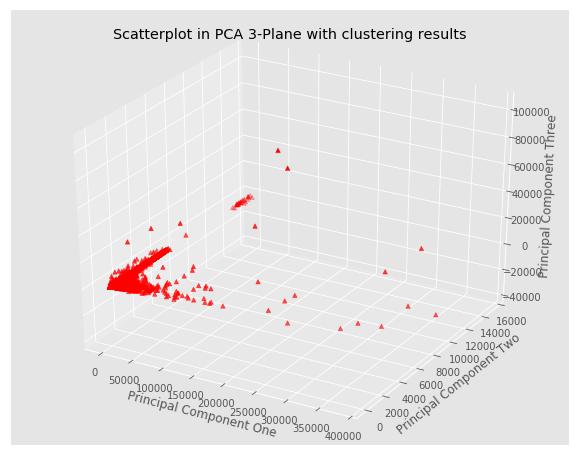

In [39]:
matplotlib_3D_X_reduced(re_X)

In [40]:
!free -m

              total        used        free      shared  buff/cache   available
Mem:           3950         862        1946          22        1141        2760
Swap:             0           0           0


In [43]:
y, assigned_cluster = kmeans_cluster(re_X,10)

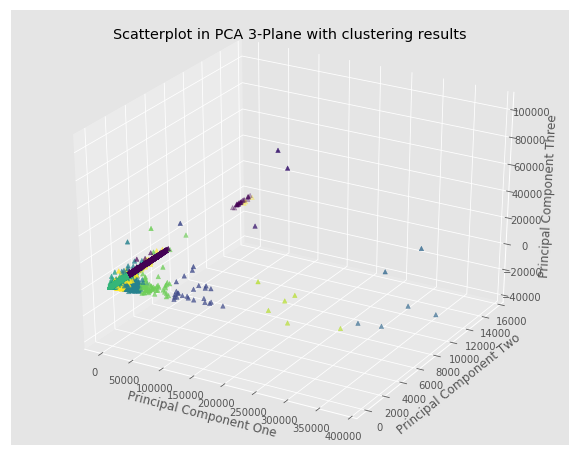

In [44]:
plot_3D_kmeans(re_X,y)

In [46]:
df['cluster'] = assigned_cluster

In [47]:
df.groupby('cluster')[list(counter3.keys())].mean()

,FIRST_YEAR_LOAN_PURCHASE_TOTAL,last_transaction_today,last_login_today,CORE_LOAN_PURCHASE_TOTAL,FIRST_YEAR_DEPOSIT_TOTAL,LIFETIME_ACCOUNT_LOAN_PURCHASE_TOTAL,LIFETIME_DEPOSIT_TOTAL
cluster,,,,,,,
0,52.623918,2053.834816,2027.506522,80.428080,31.358039,81.064568,34.353894
1,45258.333333,9.000000,96.333333,129191.666667,32046.076667,129191.666667,101268.036667
2,3608.653846,37.807692,22.038462,66825.000000,2709.996538,67725.000000,15020.135000
3,32833.333333,38.333333,91.166667,237087.500000,18656.688333,237341.666667,38431.913333
4,1999.834123,116.412322,116.819905,15129.502370,1418.917014,15262.464455,3757.766161
5,384.904496,216.741699,245.812518,1883.161916,279.488460,1911.625037,528.484731
6,70.081021,523.701681,490.022713,189.241621,43.099683,197.796496,64.660070
7,2971.250000,165.466667,172.700000,33388.750000,2531.813000,33600.916667,9299.826167
8,7266.666667,20.666667,15.333333,146933.333333,4945.705000,149991.666667,21068.366667


In [48]:
df.groupby('cluster')[list(counter3.keys())].count().iloc[:,1]

cluster
0    16866
1        3
2       26
3        6
4      211
5     3403
6    29807
7       60
8        6
9      815
Name: last_transaction_today, dtype: int64

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn import metrics

db = DBSCAN(eps=0.3, min_samples=10).fit(re_X)

In [45]:
!free -m

              total        used        free      shared  buff/cache   available
Mem:           3950         889        1918          22        1142        2732
Swap:             0           0           0


In [ ]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)

In [ ]:
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

In [ ]:
#Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)


In [ ]:
n_clusters_

In [ ]:
print('Estimated number of clusters: %d' % n_clusters_)
# print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
# print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
# print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
# print("Adjusted Rand Index: %0.3f"
#       % metrics.adjusted_rand_score(labels_true, labels))
# print("Adjusted Mutual Information: %0.3f"
#       % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(re_X, labels))